# Experiments and tests

In [1]:
from PictogramGrid import Pictogram,Page,Grid
from EvaluationGrid import grid_distance_cost,sentence_distance_cost,grid_cost
from gpgo import gpgo,load_gpgo
import os

corpus = []
input_csv_file = "default.csv"

for root, dirs, files in os.walk("training_corpora"):
    for name in files:
        corpus.append(os.path.join(root,name))
        
my_gpgo = load_gpgo(corpus,corpus,"config/default.yaml")
g,_ = my_gpgo.genetic_algorithm()

Process : 0: 100%|███████████████████████████████████████████████████████████| 500/500 [04:58<00:00,  1.68generation/s]


================GRID================

ROOT PAGE :  accueil
accueil
  |_default0
    |_default9
    |_default10
  |_default1
  |_default2
    |_default11
  |_default3
  |_default4
  |_default5
  |_default6
  |_default7
  |_default8


================PAGES===============

accueil (3x3) , 9 pictograms
default0 (3x3) , 9 pictograms
default1 (3x3) , 9 pictograms
default2 (3x3) , 9 pictograms
default3 (3x3) , 9 pictograms
default4 (3x3) , 9 pictograms
default5 (3x3) , 9 pictograms
default6 (3x3) , 9 pictograms
default7 (3x3) , 9 pictograms
default8 (3x3) , 9 pictograms
default9 (3x3) , 9 pictograms
default10 (3x3) , 9 pictograms
default11 (3x3) , 3 pictograms



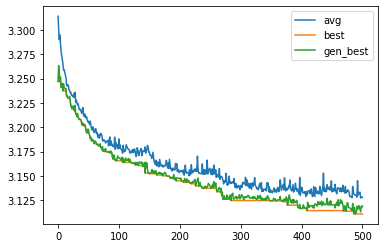

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from EvaluationGrid import grid_cost

g.to_csv()
g.display_information()


#Plot the history
avg = my_gpgo.fitness_history("average")
best = my_gpgo.fitness_history("only_best")
gen_best = my_gpgo.fitness_history("gen_best")

plt.plot(avg,label = "avg")
plt.plot(best,label = "best")
plt.plot(gen_best,label = "gen_best")

plt.legend()
plt.show()